In [43]:
# Sanity Check
from train_utils_final import *
import numpy as np
import pandas as pd
from scipy.stats import mode



In [47]:
# Read CSV file
data = pd.read_csv('C:\\Users\\nkakhani\\_Multimodal\\SoilNet-3\\SoilNet\\dataset\\LUCAS_2015_all.csv')
data = data['OC']

# Replace values above 87 with 87
data = np.where(data > 87, 87, data)

# Calculate mean value of the data
mean_value = np.mean(data)

# Create array with mean value of the data
mean_array = np.full_like(data, mean_value)

rmse, r2, rpiq, mae, mec, ccc = evaluate_regression_metrics(data, mean_array)

print(rmse)
print( r2)
print(rpiq)
print(mae)
print(mec)
print(ccc)

24.43556740478902
0.0
0.7109207033543304
19.2120709160774
-2.4964400066963584e-16
2.3691009060464573e-29


In [49]:
# Read CSV file
data = pd.read_csv('C:\\Users\\nkakhani\\_Multimodal\\SoilNet-7\\SoilNet-PreRelease\\dataset\\RapidCarbon_OC.csv')
data = data['OC']

# Calculate mean value of the data
mean_value = np.mean(data)

# Create array with mean value of the data
mean_array = np.full_like(data, mean_value)

rmse, r2, rpiq, mae, mec, ccc = evaluate_regression_metrics(data, mean_array)

print(rmse)
print( r2)
print(rpiq)
print(mae)
print(mec)
print(ccc)

417.3817310610091
0.0
0.312133262238693
169.42769539534626
-4.899634757025876e-15
-6.5857972238280795e-31


In [45]:
# Read CSV file
data = pd.read_csv('C:\\Users\\nkakhani\\_Multimodal\\SoilNet-7\\SoilNet-PreRelease\\dataset\\RapidCarbon_OC.csv')
data = data['OC']

# Calculate median value of the data
mode_value = mode(data)[0][0]

# Create array with mode value of the data
mode_array = np.full(data.shape, mode_value)

# Calculate RMSE
rmse, r2, rpiq, mae, mec, ccc = evaluate_regression_metrics(data, mode_array)

print(rmse)
print( r2)
print(rpiq)
print(mae)
print(mec)
print(ccc)

455.63877504742027
-0.191720689961983
-0.11516955454359351
182.75443606990555
182.75443606990555
nan


C:\Users\nkakhani\AppData\Local\Temp\ipykernel_7280\4121663929.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = mode(data)[0][0]
c:\Users\nkakhani\anaconda3\envs\pytorchGPU\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\nkakhani\anaconda3\envs\pytorchGPU\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [46]:
# Read CSV file
data = pd.read_csv('C:\\Users\\nkakhani\\_Multimodal\\SoilNet-7\\SoilNet-PreRelease\\dataset\\RapidCarbon_OC.csv')
data = data['OC']

# Calculate mode value of the data
median_value = np.median(data)

# Create array with mode value of the data
median_array = np.full(data.shape, median_value)

# Calculate RMSE
rmse, r2, rpiq, mae, mec, ccc = evaluate_regression_metrics(data, median_array)

print(rmse)
print( r2)
print(rpiq)
print(mae)
print(mec)
print(ccc)

428.3903379605308
-0.05344644593832926
0.07886820836307672
132.60064893606753
96.49234287990555
-1.7817869761852678e-31


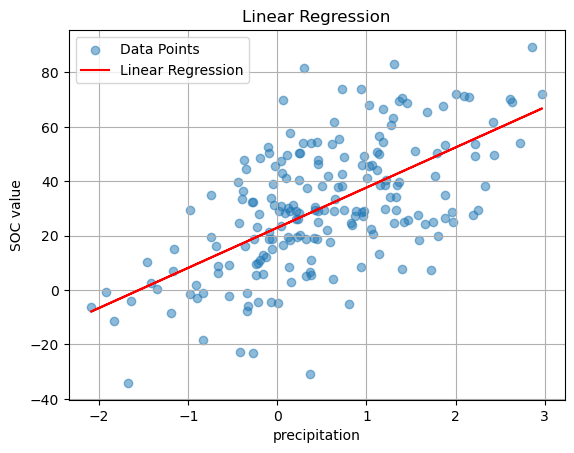

In [50]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

size = 1000
sigma = 24.43
cov = 0.6*sigma # max possible covariance would be 1.0*sigma, min: -1*sigma
cov_mat = [[sigma**2, cov], 
           [cov, 1.0]]

luca_2d = np.random.multivariate_normal((29.86, 0.5), cov_mat, size=size)
y = luca_2d[:, 0] # this is the SOC value
x = luca_2d[:, 1] # this is, say, average precipitation

p = 0.8  # proportion of data used for training
def split(data, p):
       train = data[0:int(np.floor(p*size))]
       test = data[int(np.floor(p*size)):]
       return train, test

x_train, x_test = split(x, p)
y_train, y_test = split(y, p)

# doing linear regression
slope, intercept = np.polyfit(x_train, y_train, 1)

# plotting the test data points
plt.scatter(x_test, y_test, alpha=0.5, label='Data Points')

# plotting the linear regression line
plt.plot(x_test, slope * x_test + intercept, color='red', label='Linear Regression')

plt.xlabel('precipitation')
plt.ylabel('SOC value')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# # evaluating our regression model
# pred = slope * x_test + intercept
# rmse = get_rmse(y_test, pred)
# print(f"RMSE for linear regression at covariance {cov}: {rmse}")

# # just for reference, the other model - we know this will be 24.43 for sufficiently large size
# pred = np.mean(y_train)
# rmse = get_rmse(y_test, pred)
# print(f"RMSE for predicting the mean: {rmse}")
